In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("immovlan_cleaned_astha_file.csv", encoding="utf-8-sig")

# House-type 
house_types = [
    "Residence", "Villa", "Mixed Building", "Master House",
    "Cottage", "Bungalow", "Chalet", "Mansion"
]

df['type'] = df['type'].astype(str).str.strip().str.title()

# Sadece house-type kayıtlarını seç ve df1 olarak kaydet
df1 = df[df['type'].isin(house_types)].copy()

# Kontrol
print(f"House-type dataset created with {len(df1)} rows.")
print(df1['type'].value_counts())
df1.head(10)



House-type dataset created with 5830 rows.
type
Residence    5211
Villa         450
Chalet         68
Cottage        50
Bungalow       45
Mansion         6
Name: count, dtype: int64


,url,Property ID,Price,State of the property,Availability,Number of bedrooms,Livable surface,Furnished,Attic,Garage,...,Number of facades,Garden,Surface garden,Terrace,Surface terrace,Total land surface,Swimming pool,type,postal_code,city
2,https://immovlan.be/en/detail/residence/for-sa...,vbd46297,399000.0,NaN,NaN,2.0,129.0,NaN,NaN,1.0,...,4.0,1.0,NaN,NaN,NaN,NaN,NaN,Residence,1501,buizingen
6,https://immovlan.be/en/detail/residence/for-sa...,vbd11776,190000.0,NaN,NaN,5.0,142.0,0.0,1.0,1.0,...,3.0,1.0,NaN,1.0,NaN,320.0,NaN,Residence,6830,bouillon
9,https://immovlan.be/en/detail/residence/for-sa...,rbu64988,327850.0,To be renovated,On contract,3.0,185.0,0.0,1.0,1.0,...,4.0,1.0,315.0,1.0,21.0,683.0,0.0,Residence,9810,nazareth
14,https://immovlan.be/en/detail/residence/for-sa...,vbc54869,365000.0,New,NaN,3.0,203.0,0.0,1.0,1.0,...,2.0,1.0,NaN,1.0,NaN,298.0,NaN,Residence,5001,belgrade
18,https://immovlan.be/en/detail/residence/for-sa...,rbu61502,460000.0,NaN,NaN,4.0,178.0,NaN,NaN,NaN,...,NaN,1.0,355.0,0.0,NaN,NaN,NaN,Residence,9420,erpe-mere
19,https://immovlan.be/en/detail/residence/for-sa...,vbd11793,145000.0,To be renovated,Immediately,3.0,270.0,0.0,1.0,NaN,...,NaN,0.0,NaN,0.0,NaN,NaN,NaN,Residence,6830,bouillon
20,https://immovlan.be/en/detail/residence/for-sa...,rbu66306,125000.0,To be renovated,On contract,1.0,80.0,0.0,0.0,NaN,...,2.0,1.0,NaN,1.0,NaN,168.0,0.0,Residence,9450,denderhoutem
22,https://immovlan.be/en/detail/residence/for-sa...,vbd16229,310000.0,To be renovated,NaN,3.0,146.0,0.0,1.0,1.0,...,2.0,1.0,267.0,1.0,NaN,267.0,NaN,Residence,6700,arlon
28,https://immovlan.be/en/detail/residence/for-sa...,rbu65967,449000.0,NaN,On contract,3.0,359.0,NaN,NaN,1.0,...,4.0,1.0,NaN,1.0,NaN,6932.0,NaN,Residence,3530,houthalen-helchteren
30,https://immovlan.be/en/detail/villa/for-sale/6...,vbd38998,797000.0,Excellent,On contract,5.0,350.0,0.0,NaN,1.0,...,4.0,1.0,5747.0,1.0,130.0,6145.0,1.0,Villa,6470,sivry-rance


In [159]:
df1.shape

(5830, 29)

In [160]:
df1.columns

Index(['url', 'Property ID', 'Price', 'State of the property', 'Availability',
       'Number of bedrooms', 'Livable surface', 'Furnished', 'Attic', 'Garage',
       'Number of garages', 'Kitchen equipment', 'Kitchen type',
       'Number of bathrooms', 'Number of showers', 'Number of toilets',
       'Type of heating', 'Type of glazing', 'Elevator', 'Number of facades',
       'Garden', 'Surface garden', 'Terrace', 'Surface terrace',
       'Total land surface', 'Swimming pool', 'type', 'postal_code', 'city'],
      dtype='object')

In [161]:
df1 = df1.drop_duplicates()

In [162]:
df2=df1.drop(['url','Availability','Attic','Kitchen equipment','Kitchen type','Furnished'],axis="columns")
df2.head()



,Property ID,Price,State of the property,Number of bedrooms,Livable surface,Garage,Number of garages,Number of bathrooms,Number of showers,Number of toilets,...,Number of facades,Garden,Surface garden,Terrace,Surface terrace,Total land surface,Swimming pool,type,postal_code,city
2,vbd46297,399000.0,NaN,2.0,129.0,1.0,NaN,1.0,1.0,1.0,...,4.0,1.0,NaN,NaN,NaN,NaN,NaN,Residence,1501,buizingen
6,vbd11776,190000.0,NaN,5.0,142.0,1.0,1.0,NaN,1.0,3.0,...,3.0,1.0,NaN,1.0,NaN,320.0,NaN,Residence,6830,bouillon
9,rbu64988,327850.0,To be renovated,3.0,185.0,1.0,1.0,1.0,1.0,2.0,...,4.0,1.0,315.0,1.0,21.0,683.0,0.0,Residence,9810,nazareth
14,vbc54869,365000.0,New,3.0,203.0,1.0,1.0,NaN,1.0,2.0,...,2.0,1.0,NaN,1.0,NaN,298.0,NaN,Residence,5001,belgrade
18,rbu61502,460000.0,NaN,4.0,178.0,NaN,NaN,1.0,NaN,2.0,...,NaN,1.0,355.0,0.0,NaN,NaN,NaN,Residence,9420,erpe-mere


In [163]:
df2.shape

(5830, 23)

In [ ]:
df2.isnull().sum()

In [167]:
import numpy as np

# "nan" olan stringleri gerçek NaN'e çevir
df2["Price"] = df2["Price"].replace("nan", np.nan)

In [171]:
df3=df2.dropna(subset=["Price"])

In [172]:
df3.shape

(5697, 23)

In [ ]:
df3.dtypes

In [ ]:
df3.isnull().sum()

##Numerical coloumns filled with median less effected by outliers

In [174]:
df4 = df3.copy()


num_cols = [
    "Number of bedrooms","Livable surface","Number of bathrooms","Number of toilets",
    "Number of facades","Surface garden","Surface terrace","Total land surface",
    "Number of garages","Number of showers"
]

for col in num_cols:
    df4[col] = pd.to_numeric(df4[col], errors="coerce")
    df4[col] = df4[col].fillna(df4[col].median())


In [175]:
df4[num_cols].isna().sum()

Number of bedrooms     0
Livable surface        0
Number of bathrooms    0
Number of toilets      0
Number of facades      0
Surface garden         0
Surface terrace        0
Total land surface     0
Number of garages      0
Number of showers      0
dtype: int64

In [176]:
df4[num_cols].describe()

,Number of bedrooms,Livable surface,Number of bathrooms,Number of toilets,Number of facades,Surface garden,Surface terrace,Total land surface,Number of garages,Number of showers
count,5697.000000,5697.000000,5697.000000,5697.000000,5697.000000,5697.000000,5697.000000,5697.000000,5697.000000,5697.000000
mean,3.453923,194.678954,1.364227,2.009830,3.076005,588.442601,28.236791,1029.892926,1.472705,1.264350
std,1.436150,113.077894,1.062746,1.043762,0.740588,3704.148360,69.723246,3372.613031,25.686419,8.426169
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000
25%,3.000000,140.000000,1.000000,2.000000,3.000000,333.500000,24.000000,293.000000,1.000000,1.000000
50%,3.000000,171.000000,1.000000,2.000000,3.000000,333.500000,24.000000,500.000000,1.000000,1.000000
75%,4.000000,214.000000,1.000000,2.000000,4.000000,333.500000,24.000000,880.000000,1.000000,1.000000
max,50.000000,2350.000000,50.000000,50.000000,4.000000,200000.000000,2968.000000,101895.000000,1936.000000,482.000000


##Binary coloumn converted 0 and 1

In [177]:
df5 = df4.copy()
binary_cols = ["Garage", "Garden", "Terrace", "Elevator", "Swimming pool"]

for col in binary_cols:
    df5[col] = df5[col].fillna(0)
    df5[col] = df5[col].apply(lambda x: 1 if x != 0 else 0)
df5[binary_cols].head()


,Garage,Garden,Terrace,Elevator,Swimming pool
2,1,1,0,0,0
6,1,1,1,0,0
9,1,1,1,0,0
14,1,1,1,0,0
18,0,1,0,0,0


In [178]:

print(df5['Garage'].isna().sum())

# 2. check all binary col
binary_cols = ["Garage", "Garden", "Terrace", "Elevator", "Swimming pool"]
print(df5[binary_cols].isna().sum())

print(df5[df5['Garage'].isna()])


0
Garage           0
Garden           0
Terrace          0
Elevator         0
Swimming pool    0
dtype: int64
Empty DataFrame
Columns: [Property ID, Price, State of the property, Number of bedrooms, Livable surface, Garage, Number of garages, Number of bathrooms, Number of showers, Number of toilets, Type of heating, Type of glazing, Elevator, Number of facades, Garden, Surface garden, Terrace, Surface terrace, Total land surface, Swimming pool, type, postal_code, city]
Index: []

[0 rows x 23 columns]


##OUTLIERS REMOVAL

In [188]:
df5['Price'].describe()


count    5.697000e+03
mean     4.271067e+05
std      3.236623e+05
min      5.000000e+03
25%      2.650000e+05
50%      3.699000e+05
75%      4.900000e+05
max      8.600002e+06
Name: Price, dtype: float64

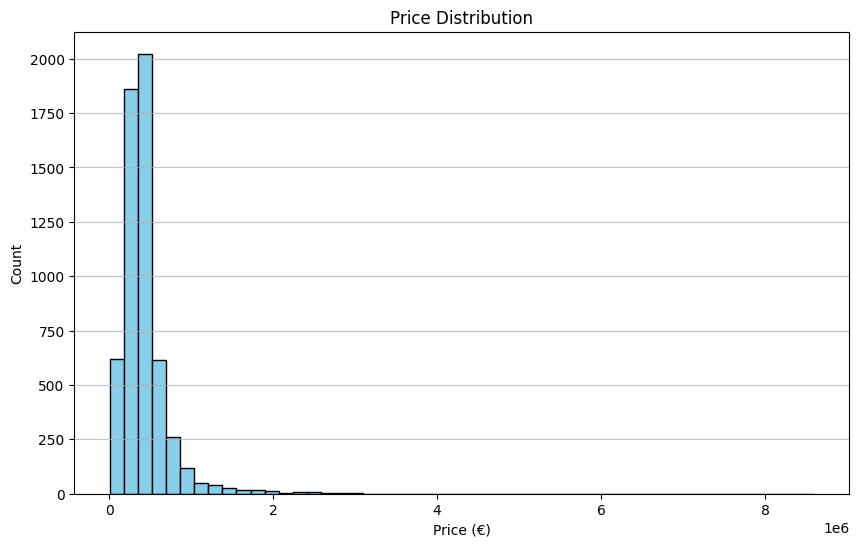

In [197]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.hist(df5['Price'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel("Price (€)")
plt.ylabel("Count")
plt.title("Price Distribution")
plt.grid(axis='y', alpha=0.75)
plt.show()


In [219]:
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "browser"

fig = px.box(df5, y="Price", points="all", title="House Price Distribution with Outliers")
fig.show()


Items with outliers

In [ ]:
import matplotlib.pyplot as plt

# Numeric columns list
numeric_cols = [
    "Price",
    "Number of bedrooms",
    "Livable surface",
    "Number of bathrooms",
    "Number of toilets",
    "Number of facades",
    "Surface garden",
    "Surface terrace",
    "Total land surface",
    "Number of garages",
    "Number of showers"
]

# Boxplot ile outlierları görselleştirme
for col in numeric_cols:
    plt.figure(figsize=(8,4))
    plt.boxplot(df5[col], vert=False)
    plt.title(f"{col} Distribution with Outliers")
    plt.xlabel(col)
    plt.show()


Items with outliers

In [223]:
import plotly.express as px

numeric_cols = [
    "Price",
    "Number of bedrooms",
    "Livable surface",
    "Number of bathrooms",
    "Number of toilets",
    "Number of facades",
    "Surface garden",
    "Surface terrace",
    "Total land surface",
    "Number of garages",
    "Number of showers"
]

for col in numeric_cols:
    fig = px.box(
        df5,
        y=col,
        points="all",  # tüm noktaları ve outlier’ları göster
        title=f"{col} Distribution with Outliers"
    )
    fig.show()


en son kod

In [ ]:


# ---- 1) Custom Outlier Thresholds ----

outlier_rules = {
    "Price": {"min": 50000, "max": 5000000},
    "Number of bedrooms": {"min": 0, "max": 10},
    "Livable surface": {"min": 10, "max": 1000},
    "Number of bathrooms": {"min": 0, "max": 10},
    "Number of toilets": {"min": 0, "max": 10},
    "Number of facades": {"min": 1, "max": 4},
    "Surface garden": {"min": 0, "max": 2000},
    "Surface terrace": {"min": 0, "max": 500},
    "Total land surface": {"min": 0, "max": 5000},
    "Number of garages": {"min": 0, "max": 5},
    "Number of showers": {"min": 0, "max": 10}
}

# ---- 2) BEFORE = df5 ----
df_before = df5.copy()

# ---- 3) Temizleme Fonksiyonu ----
def remove_outliers(df, rules):
    df_clean = df.copy()
    for col, limits in rules.items():
        if "min" in limits:
            df_clean = df_clean[df_clean[col] >= limits["min"]]
        if "max" in limits:
            df_clean = df_clean[df_clean[col] <= limits["max"]]
    return df_clean

# ---- 4) OUTLIER CLEANING → df6 ----
df6 = remove_outliers(df5, outlier_rules)

print("Before:", len(df5))
print("After :", len(df6))
print("Removed:", len(df5) - len(df6))

# ---- 5) BEFORE vs AFTER BOX PLOTS ----
for col in outlier_rules.keys():
    plt.figure(figsize=(9,4))
    plt.boxplot(
        [df_before[col], df6[col]],
        labels=["Before", "After"],
        vert=False
    )
    plt.title(f"{col} – Before vs After Outlier Removal")
    plt.xlabel(col)
    plt.show()


In [234]:
import plotly.express as px

# numeric columns
numeric_cols = [
    "Price", "Number of bedrooms", "Livable surface", "Number of bathrooms",
    "Number of toilets", "Number of facades", "Surface garden", 
    "Surface terrace", "Total land surface", "Number of garages",
    "Number of showers"
]

for col in numeric_cols:
    print(f"📌 Plotting {col}...")

    # --- HISTOGRAM BEFORE ---
    fig1 = px.histogram(df5, x=col, nbins=50,
                        title=f"{col} - BEFORE Outlier Removal")
    fig1.show()

    # --- HISTOGRAM AFTER ---
    fig2 = px.histogram(df6, x=col, nbins=50,
                        title=f"{col} - AFTER Outlier Removal")
    fig2.show()

    # --- BOX PLOT BEFORE ---
    fig3 = px.box(df5, y=col, title=f"{col} - BEFORE Outlier Removal (Boxplot)")
    fig3.show()

    # --- BOX PLOT AFTER ---
    fig4 = px.box(df6, y=col, title=f"{col} - AFTER Outlier Removal (Boxplot)")
    fig4.show()


📌 Plotting Price...
📌 Plotting Number of bedrooms...
📌 Plotting Livable surface...
📌 Plotting Number of bathrooms...
📌 Plotting Number of toilets...
📌 Plotting Number of facades...
📌 Plotting Surface garden...
📌 Plotting Surface terrace...
📌 Plotting Total land surface...
📌 Plotting Number of garages...
📌 Plotting Number of showers...


In [235]:
df7 = df6.copy()

Which cities have the highest average house prices?

In [271]:
fig_postal = px.bar(
    postal_avg, 
    x="postal_code", 
    y="Price",
    title="Average House Price by Postal Code",
    labels={"Price":"Average Price (€)", "postal_code":"Postal Code"},
    color="Price",
    color_continuous_scale="Cividis"  # <- değişiklik burada
)
fig_postal.show()

PPT GRAPH

In [278]:
import plotly.express as px

# Calculate average house price per city
city_avg = df7.groupby("city", as_index=False)["Price"].mean()
city_avg = city_avg.sort_values("Price", ascending=False)

# Plot with bright colors
fig_city = px.bar(
    city_avg,
    x="city",
    y="Price",
    title="Average House Price by City",
    labels={"Price": "Average Price (€)", "city": "City"},
    color="Price",
    color_continuous_scale="Turbo",  # vibrant color scale
)

fig_city.update_layout(
    xaxis_tickangle=45,
    height=600,
    template="plotly_white",
    showlegend=False,
)

fig_city.show()


How does the number of bedrooms affect the house price?

How does livable surface area affect the house price?

How do additional features (Garage, Garden, Terrace, Elevator, Swimming Pool) impact price?

In [239]:
df7.groupby("type")["type"].agg("count")

type
Bungalow       39
Chalet         55
Cottage        39
Mansion         3
Residence    4886
Villa         375
Name: type, dtype: int64

In [ ]:
columns_to_check = [
    'Number of bedrooms', 'Livable surface', 'Number of garages',
    'Number of bathrooms', 'Number of showers', 'Number of toilets',
    'Surface garden', 'Surface terrace'
]

for col in columns_to_check:
    print(f"\n--- {col} ---")
    print(df7[col].describe().apply(lambda x: format(x, ',.0f')))


In [243]:
# Create Price per m² column in your main DataFrame
df7['Price_per_m2'] = df7['Price'] / df7['Livable surface']

# Check the first few rows
df7[['Price', 'Livable surface', 'Price_per_m2']].head(20)


,Price,Livable surface,Price_per_m2
2,399000.0,129.0,3093.023256
6,190000.0,142.0,1338.028169
9,327850.0,185.0,1772.162162
14,365000.0,203.0,1798.029557
18,460000.0,178.0,2584.269663
19,145000.0,270.0,537.037037
20,125000.0,80.0,1562.500000
22,310000.0,146.0,2123.287671
34,521200.0,175.0,2978.285714
39,490000.0,150.0,3266.666667


      postal_code                   city         Price
174          2222                 itegem  1.490000e+06
148          1950               kraainem  1.461667e+06
646          5555                  naome  1.450000e+06
295          3210                 linden  1.395000e+06
60           1380  couture-saint-germain  1.345000e+06
792          6663               mabompre  1.250000e+06
1068         8510                  marke  1.228500e+06
104          1630              linkebeek  1.209667e+06
154          1982                 weerde  1.145000e+06
18           1180                  ukkel  1.102931e+06
17           1170    watermaal-bosvoorde  1.049500e+06
1192         9280                lebbeke  1.030000e+06
267          3001               heverlee  1.013333e+06
275          3061               leefdaal  9.950000e+05
516          4728             hergenrath  9.950000e+05
793          6666                 wibrin  9.800000e+05
4            1050                 elsene  9.577273e+05
3         

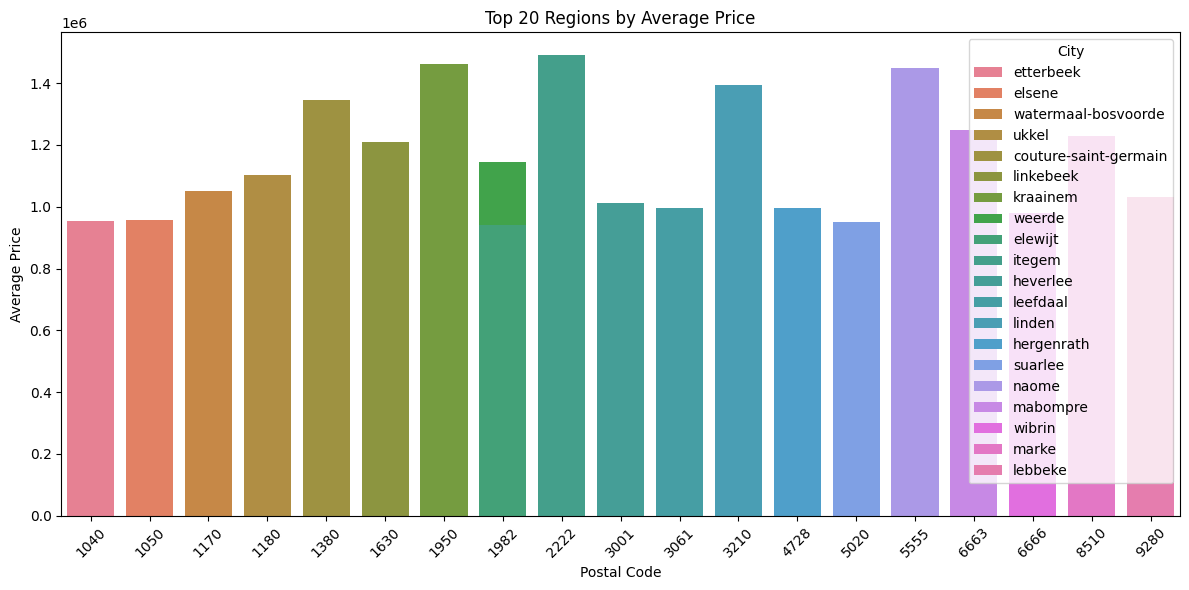

In [279]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Clean 'Price' column and convert to numeric
df7['Price'] = df7['Price'].astype(str).str.replace(r'[^\d.]', '', regex=True)
df7['Price'] = pd.to_numeric(df['Price'], errors='coerce')


# Calculate average price per postal code and city
avg_price = df7.groupby(['postal_code','city'])['Price'].mean().reset_index()
avg_price = avg_price.sort_values('Price', ascending=False)

# Display top 20 regions with highest average price
print(avg_price.head(20))

# Visualization: Bar plot for top 20 regions
plt.figure(figsize=(12,6))
sns.barplot(data=avg_price.head(20), x='postal_code', y='Price', hue='city', dodge=False)
plt.title("Top 20 Regions by Average Price")
plt.xlabel("Postal Code")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.legend(title='City')
plt.tight_layout()
plt.show()


##Group by postal code and analyze price

##Group by postal code and city

In [265]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group by both postal_code and city
house_by_region = (
    df7.groupby(['postal_code', 'city'])['Price']
    .agg(['count', 'mean', 'median', 'min', 'max'])
    .reset_index()
    .sort_values('mean', ascending=False)
)

print("Top 10 regions (postal_code + city) by average house price:")
print(house_by_region.head(10))


Top 10 regions (postal_code + city) by average house price:
      postal_code                   city  count          mean     median  \
174          2222                 itegem      1  1.490000e+06  1490000.0   
148          1950               kraainem      6  1.461667e+06  1447500.0   
646          5555                  naome      1  1.450000e+06  1450000.0   
295          3210                 linden      1  1.395000e+06  1395000.0   
60           1380  couture-saint-germain      1  1.345000e+06  1345000.0   
792          6663               mabompre      1  1.250000e+06  1250000.0   
1068         8510                  marke      2  1.228500e+06  1228500.0   
104          1630              linkebeek      3  1.209667e+06  1490000.0   
154          1982                 weerde      1  1.145000e+06  1145000.0   
18           1180                  ukkel     29  1.102931e+06   899000.0   

            min        max  
174   1490000.0  1490000.0  
148   1180000.0  1850000.0  
646   1450000.0 

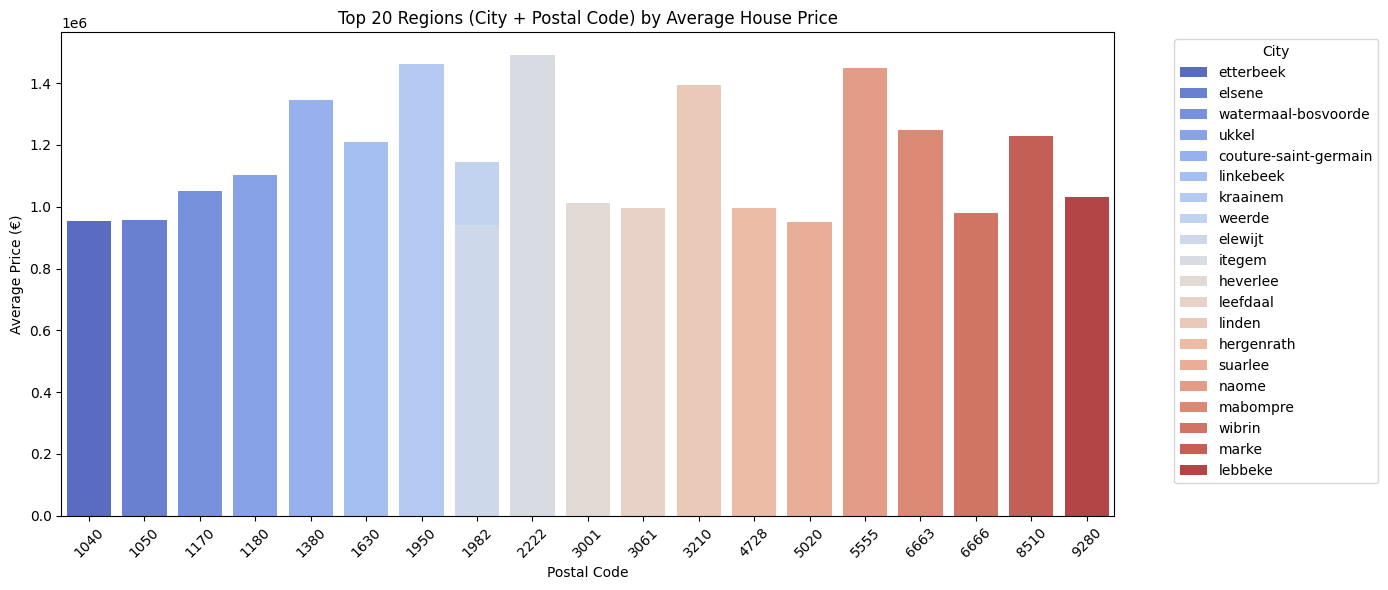

In [266]:
plt.figure(figsize=(14,6))
top20 = house_by_region.head(20)
sns.barplot(data=top20, x='postal_code', y='mean', hue='city', dodge=False, palette='coolwarm')

plt.title("Top 20 Regions (City + Postal Code) by Average House Price")
plt.xlabel("Postal Code")
plt.ylabel("Average Price (€)")
plt.xticks(rotation=45)
plt.legend(title="City", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [267]:
import pandas as pd
import plotly.express as px
import plotly.io as pio

# Make Plotly open charts in browser
pio.renderers.default = "browser"

# Group by city and calculate average house price
avg_price_city = (
    df7.groupby("city", as_index=False)["Price"]
    .mean()
    .sort_values("Price", ascending=False)
)

# Interactive Plotly bar chart
fig = px.bar(
    avg_price_city,
    x="city",
    y="Price",
    color="Price",
    text=avg_price_city["Price"].round(0),
    title="Average House Price by City",
    labels={"city": "City", "Price": "Average Price (€)"},
    color_continuous_scale="Viridis"
)

# Customize layout
fig.update_traces(textposition="outside")
fig.update_layout(
    xaxis_tickangle=45,
    height=700,
    showlegend=False,
    template="plotly_white",
    margin=dict(l=40, r=40, t=80, b=250)
)

# Open chart in browser
fig.show()


In [ ]:
import plotly.express as px
import plotly.io as pio

# Make Plotly open charts in browser
pio.renderers.default = "browser"

# Remove rows with missing Price or Number of Bedrooms
bedroom_df = df7.dropna(subset=["Price", "Number of bedrooms"])

# Convert Number of bedrooms to string for discrete coloring
bedroom_df["Number of bedrooms"] = bedroom_df["Number of bedrooms"].astype(int).astype(str)

# Box plot: Price distribution by Number of Bedrooms
fig = px.box(
    bedroom_df,
    x="Number of bedrooms",
    y="Price",
    color="Number of bedrooms",
    title="Impact of Number of Bedrooms on House Price",
    labels={"Number of bedrooms": "Number of Bedrooms", "Price": "Price (€)"},
    points="all"  # shows individual data points
)

# Customize layout
fig.update_layout(
    xaxis=dict(type="category"),
    yaxis=dict(title="Price (€)"),
    showlegend=False,
    template="plotly_white",
    height=700,
    margin=dict(l=60, r=60, t=80, b=80)
)

# Open chart in browser
fig.show()


C:\Users\esram\AppData\Local\Temp\ipykernel_18396\2223486454.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



##impact of number of bedrooms on house price.

In [258]:
import plotly.express as px

# Remove missing data
bedroom_df = df7.dropna(subset=["Price", "Number of bedrooms"])

fig = px.scatter(
    bedroom_df,
    x="Number of bedrooms",
    y="Price",
    color="Number of bedrooms",
    title="House Price vs Number of Bedrooms",
    labels={"Price": "Price (€)", "Number of bedrooms": "Bedrooms"}
)

fig.show()


##What is the correlation between the variables and the price

##group by the number of bedrooms and calculate the average house price per group

In [259]:
import pandas as pd
import plotly.express as px
import plotly.io as pio

# Make Plotly open charts in browser
pio.renderers.default = "browser"

# Drop rows with missing values
bedroom_df = df7.dropna(subset=["Price", "Number of bedrooms"])

# Ensure numeric
bedroom_df["Number of bedrooms"] = pd.to_numeric(bedroom_df["Number of bedrooms"], errors="coerce")
bedroom_df["Price"] = pd.to_numeric(bedroom_df["Price"], errors="coerce")

# Group by number of bedrooms and calculate average price
avg_price_bedrooms = (
    bedroom_df.groupby("Number of bedrooms", as_index=False)["Price"]
    .mean()
    .sort_values("Number of bedrooms")
)

# Plot average price per number of bedrooms
fig = px.bar(
    avg_price_bedrooms,
    x="Number of bedrooms",
    y="Price",
    text=avg_price_bedrooms["Price"].round(0),
    title="Average House Price by Number of Bedrooms",
    labels={"Number of bedrooms": "Number of Bedrooms", "Price": "Average Price (€)"},
    color="Price",
    color_continuous_scale="Viridis"
)

# Customize layout
fig.update_traces(textposition="outside")
fig.update_layout(
    xaxis=dict(type="category"),
    height=600,
    showlegend=False,
    template="plotly_white",
    margin=dict(l=60, r=60, t=80, b=80)
)

# Open chart in browser
fig.show()


C:\Users\esram\AppData\Local\Temp\ipykernel_11224\3925485794.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\esram\AppData\Local\Temp\ipykernel_11224\3925485794.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



##correlation between Number of Bedrooms and Price, and then show a scatter

In [280]:
import pandas as pd
import plotly.express as px

# Clean DataFrame
bedroom_df = df7.dropna(subset=["Price", "Number of bedrooms"]).copy()
bedroom_df.loc[:, "Number of bedrooms"] = pd.to_numeric(bedroom_df["Number of bedrooms"], errors="coerce")
bedroom_df.loc[:, "Price"] = pd.to_numeric(bedroom_df["Price"], errors="coerce")

# Calculate correlation
correlation = bedroom_df["Number of bedrooms"].corr(bedroom_df["Price"]) 
print(f"Correlation between Number of Bedrooms and Price: {correlation:.4f}")

# Scatter plot
fig = px.scatter(
    bedroom_df,
    x="Number of bedrooms",
    y="Price",
    title="House Price vs. Number of Bedrooms",
    labels={"Number of bedrooms": "Number of Bedrooms", "Price": "Price (€)"})


Correlation between Number of Bedrooms and Price: 0.4254


In [261]:
import pandas as pd
import plotly.express as px
import plotly.io as pio

# Make Plotly open charts in browser
pio.renderers.default = "browser"

# Clean DataFrame
bedroom_df = df7.dropna(subset=["Price", "Number of bedrooms"]).copy()
bedroom_df["Number of bedrooms"] = pd.to_numeric(bedroom_df["Number of bedrooms"], errors="coerce")
bedroom_df["Price"] = pd.to_numeric(bedroom_df["Price"], errors="coerce")

# Calculate correlation
correlation = bedroom_df["Number of bedrooms"].corr(bedroom_df["Price"])
print(f"Correlation between Number of Bedrooms and Price: {correlation:.4f}")

# Scatter plot with average overlay
fig = px.scatter(
    bedroom_df,
    x="Number of bedrooms",
    y="Price",
    title="House Price vs. Number of Bedrooms",
    labels={"Number of bedrooms": "Number of Bedrooms", "Price": "Price (€)"},
    color="Number of bedrooms",
    hover_data=["city", "postal_code"]
)

# Add average price per bedroom count
avg_price_bedroom = bedroom_df.groupby("Number of bedrooms", as_index=False)["Price"].mean()
fig.add_scatter(
    x=avg_price_bedroom["Number of bedrooms"],
    y=avg_price_bedroom["Price"],
    mode="lines+markers",
    name="Average Price",
    line=dict(color="black", width=2),
)

# Show plot in browser
fig.show()


Correlation between Number of Bedrooms and Price: 0.4254


PPT GRAPH How does Livable surface correlate with price?



In [281]:
import pandas as pd
import plotly.express as px
import plotly.io as pio

# Make sure charts open in browser
pio.renderers.default = "browser"

# Drop missing values and ensure numeric
surface_df = df7.dropna(subset=["Price", "Livable surface"]).copy()
surface_df["Price"] = pd.to_numeric(surface_df["Price"], errors="coerce")
surface_df["Livable surface"] = pd.to_numeric(surface_df["Livable surface"], errors="coerce")

# Calculate correlation
correlation = surface_df["Livable surface"].corr(surface_df["Price"])
print(f"Correlation between Livable Surface and Price: {correlation:.4f}")


Correlation between Livable Surface and Price: 0.5867


In [282]:
import plotly.express as px
import plotly.io as pio

pio.renderers.default = "browser"

fig = px.scatter(
    surface_df,
    x="Livable surface",
    y="Price",
    title="House Price vs Livable Surface",
    labels={"Livable surface": "Livable Surface (m²)", "Price": "Price (€)"},
    trendline="ols",
    color="Livable surface",
    hover_data=["city", "postal_code"]
)

fig.show()
